# Making a nice Oribtal Period-Mass plot for detection methods of exoplanets

In [2]:
#Load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df = pd. read_csv("planets_2021.02.07.csv")
df

,pl_discmethod,Period[days],Mass[Jupiter Mass]
0,Radial Velocity,326.030000,19.4000
1,Radial Velocity,516.219970,14.7400
2,Radial Velocity,185.840000,4.8000
3,Radial Velocity,1773.400020,4.6600
4,Radial Velocity,798.500000,1.7800
...,...,...,...
4336,Radial Velocity,305.500000,20.6000
4337,Radial Velocity,4.617033,0.6876
4338,Radial Velocity,241.258000,1.9810
4339,Radial Velocity,1276.460000,4.1320


In [5]:
#Now cleaning the dataframe because some of the rows doesn't have values for period and mass
df_clean = df.dropna()
df_clean

,pl_discmethod,Period[days],Mass[Jupiter Mass]
0,Radial Velocity,326.030000,19.4000
1,Radial Velocity,516.219970,14.7400
2,Radial Velocity,185.840000,4.8000
3,Radial Velocity,1773.400020,4.6600
4,Radial Velocity,798.500000,1.7800
...,...,...,...
4336,Radial Velocity,305.500000,20.6000
4337,Radial Velocity,4.617033,0.6876
4338,Radial Velocity,241.258000,1.9810
4339,Radial Velocity,1276.460000,4.1320


In [6]:
#Now I am interested in saving this dataframe as a new .csv file in the current directory
df_clean.to_csv('exoplanetas.csv', index = False) 

In [7]:
df_clean.groupby("pl_discmethod").count()

,Period[days],Mass[Jupiter Mass]
pl_discmethod,,
Astrometry,1,1
Eclipse Timing Variations,16,16
Imaging,6,6
Microlensing,8,8
Orbital Brightness Modulation,3,3
Pulsar Timing,6,6
Pulsation Timing Variations,2,2
Radial Velocity,824,824
Transit,793,793


In [8]:
#Now, filtering a little more
radial = df_clean[df_clean["pl_discmethod"].str.contains("Radial Velocity")]
radial

,pl_discmethod,Period[days],Mass[Jupiter Mass]
0,Radial Velocity,326.030000,19.4000
1,Radial Velocity,516.219970,14.7400
2,Radial Velocity,185.840000,4.8000
3,Radial Velocity,1773.400020,4.6600
4,Radial Velocity,798.500000,1.7800
...,...,...,...
4336,Radial Velocity,305.500000,20.6000
4337,Radial Velocity,4.617033,0.6876
4338,Radial Velocity,241.258000,1.9810
4339,Radial Velocity,1276.460000,4.1320


In [9]:
#Now, filtering a little more
transit = df_clean[df_clean["pl_discmethod"].str.contains("Transit")]
transit

,pl_discmethod,Period[days],Mass[Jupiter Mass]
43,Transit,8.463210,0.18000
51,Transit,41.685500,0.07000
68,Transit,1.508956,1.03000
69,Transit,13.240600,2.75000
70,Transit,2.994330,2.33000
...,...,...,...
4297,Transit,4.125080,1.42000
4298,Transit,4.187756,1.19000
4299,Transit,3.765001,4.40000
4300,Transit,2.864142,0.70900


In [10]:
#Now, filtering a little more
micro = df_clean[df_clean["pl_discmethod"].str.contains("Microlensing")]
imagi = df_clean[df_clean["pl_discmethod"].str.contains("Imaging")]
eclip = df_clean[df_clean["pl_discmethod"].str.contains("Eclipse Timing Variations")]
pulsa = df_clean[df_clean["pl_discmethod"].str.contains("Pulsar Timing")]
brigh = df_clean[df_clean["pl_discmethod"].str.contains("Orbital Brightness Modulation")]
tr_va = df_clean[df_clean["pl_discmethod"].str.contains("Transit Timing Variations")]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


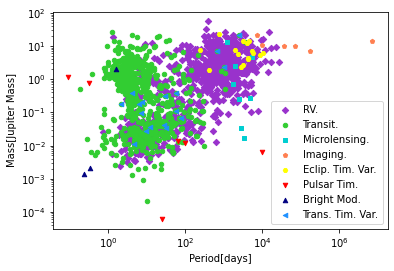

In [34]:
ax = plt.gca()
radial.plot(kind='scatter',x='Period[days]',y='Mass[Jupiter Mass]', marker= "D", color='darkorchid', logx = True, logy = True, label = "RV.", ax=ax)
transit.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "o", color='limegreen', logx = True, logy = True, label="Transit.",ax=ax)
micro.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "s", color='darkturquoise', logx = True, logy = True, label="Microlensing.",ax=ax)
imagi.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "p", color='coral', logx = True, logy = True, label="Imaging.",ax=ax)
eclip.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "H", color='yellow', logx = True, logy = True, label="Eclip. Tim. Var.",ax=ax)
pulsa.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "v", color='red', logx = True, logy = True, label="Pulsar Tim.",ax=ax)
brigh.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "^", color='navy', logx = True, logy = True, label="Bright Mod.",ax=ax)
tr_va.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "<", color='dodgerblue', logx = True, logy = True, label="Trans. Tim. Var.",ax=ax)
plt.savefig('detection_methods.eps',format='eps', bbox_inches='tight')
plt.savefig('detection_methods.png', format='png', bbox_inches='tight', dpi=300)
plt.show()